# 🛳️ Análisis Exploratorio de Datos (EDA) – Dataset Titanic de Seaborn

Este proyecto forma parte de mi serie de **proyectos personales de ciencia de datos**, cuyo objetivo es aplicar técnicas de análisis exploratorio para comprender mejor datasets reales y accesibles.

En este caso, utilizo el dataset `titanic` provisto por la librería `Seaborn`, que contiene información sobre los pasajeros del Titanic y su supervivencia, con el fin de explorar patrones y relaciones entre las variables.

## 📌 Objetivos del proyecto

- Cargar y explorar el dataset `titanic` de Seaborn
- Analizar la distribución de las variables principales
- Identificar relaciones significativas entre características y la variable objetivo (`survived`)
- Visualizar los datos de forma clara y efectiva usando `Seaborn` y `Matplotlib`

## 🧰 Herramientas utilizadas

- Python 3.12
- Pandas
- NumPy
- Matplotlib
- Seaborn

> 🔗 Repositorio en [GitHub](https://github.com/jFet1/Proyectos_personales)


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

## 📊 Medidas de tendencia central en variables numéricas

Antes de adentrarnos en el análisis profundo del dataset, es útil observar cómo se distribuyen algunas variables clave a través de sus **medidas de tendencia central**: **media**, **mediana** y **moda**.

Estas tres estadísticas nos permiten comprender la forma general de los datos y detectar posibles sesgos, asimetrías o valores atípicos.

En esta sección visualizamos la distribución de tres variables numéricas relevantes del dataset del Titanic:

- `age` (edad de los pasajeros)
- `fare` (costo del pasaje)
- `sibsp` (cantidad de familiares a bordo, hermanos/esposos)

En cada gráfico se destacan:
- **Moda**: línea naranja punteada
- **Media**: línea roja punteada
- **Mediana**: línea verde punteada


In [21]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


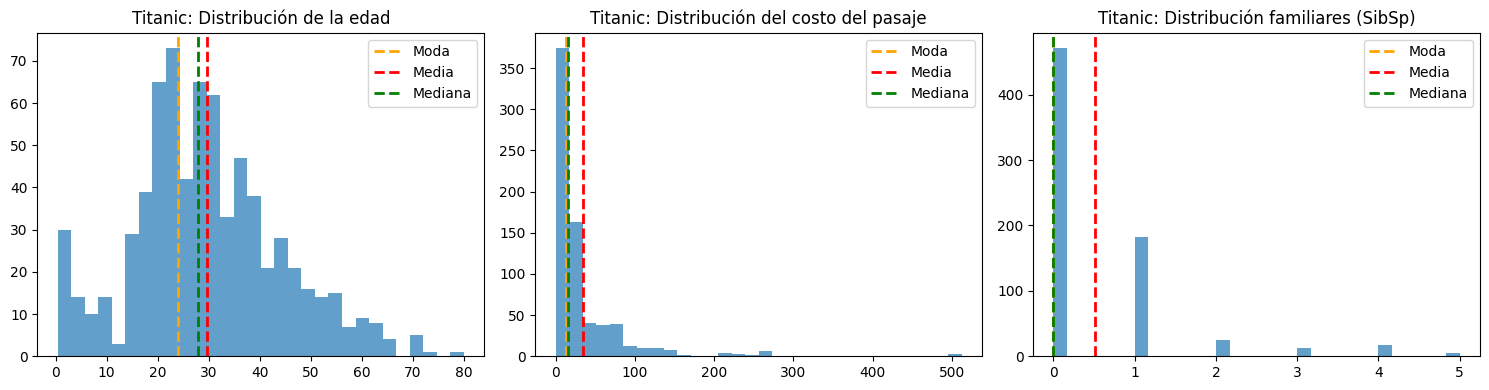

In [22]:
titanic_df_reduced = titanic_df[['age', 'fare', 'sibsp']].dropna()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))


def plot_distribution(ax: np.ndarray, data: pd.DataFrame, title: str) -> None:
    ax.hist(data, bins=30, alpha=0.7)
    ax.axvline(data.mode()[0], color='orange', linestyle='dashed',
               linewidth=2, label='Moda')
    ax.axvline(data.mean(), color='red', linestyle='dashed',
               linewidth=2, label='Media')
    ax.axvline(data.median(), color='green', linestyle='dashed',
               linewidth=2, label='Mediana')
    ax.set_title(title)
    ax.legend()


plot_distribution(axes[0], titanic_df_reduced['age'],
                  'Titanic: Distribución de la edad')
plot_distribution(axes[1], titanic_df_reduced['fare'],
                  'Titanic: Distribución del costo del pasaje')
plot_distribution(axes[2], titanic_df_reduced['sibsp'],
                  'Titanic: Distribución familiares (SibSp)')

plt.tight_layout()
plt.show()

## 🧠 Conclusiones preliminares

- **Edad (`age`)**: presenta una distribución aproximadamente normal, aunque con una ligera asimetría hacia la derecha (cola larga de personas mayores). La moda está cerca de los 20 años, lo cual puede reflejar un gran número de jóvenes a bordo.
  
- **Costo del pasaje (`fare`)**: tiene una distribución altamente sesgada a la derecha, con muchos pasajeros que pagaron tarifas bajas y unos pocos que pagaron pasajes muy elevados. La media está claramente influenciada por estos valores extremos, alejándose mucho de la mediana y la moda.

- **Familiares a bordo (`sibsp`)**: está fuertemente concentrada en el valor 0, lo que indica que la mayoría de los pasajeros viajaban sin hermanos/as o esposos/as. La media es mayor que la mediana y la moda, lo que también refleja una distribución asimétrica.

Estas visualizaciones nos ayudan a identificar qué variables tienen distribuciones balanceadas y cuáles podrían necesitar transformaciones (como logaritmos) para futuros modelos predictivos.


---

## 🧩 Análisis y tratamiento de valores faltantes

Un paso fundamental en cualquier análisis exploratorio es la detección y el tratamiento de valores faltantes. La presencia de datos nulos puede distorsionar las estadísticas, afectar las visualizaciones y generar errores en modelos predictivos si no se maneja adecuadamente.

En esta sección se identifican las variables con datos ausentes en el dataset `titanic` de Seaborn, evaluando su proporción relativa y considerando estrategias de imputación o descarte según el caso.

El objetivo es garantizar que el conjunto de datos esté limpio y preparado para los siguientes pasos del análisis sin comprometer su integridad.


Valores faltantes por columna:
deck           688
age            177
embarked         2
embark_town      2
dtype: int64


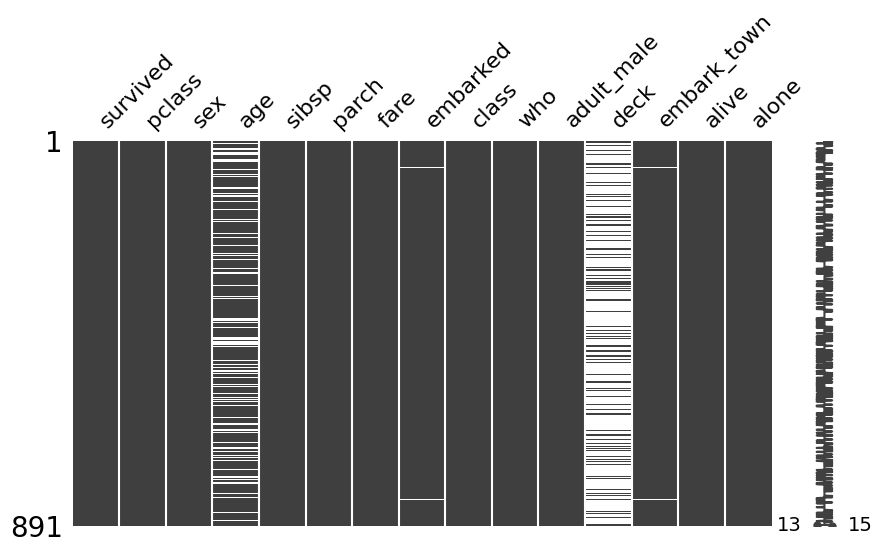

In [23]:
# Cantidad de nulos por columna
missing_counts = titanic_df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

# Mostrar resultado
print("Valores faltantes por columna:")
print(missing_counts)

# Visualización gráfica
msno.matrix(titanic_df, figsize=(10, 5))
plt.show()


## 🧠 Conclusiones sobre los valores faltantes

Del análisis de valores faltantes se observa lo siguiente:

- **`deck`** presenta una gran cantidad de valores ausentes (688 sobre 891), lo que representa más del 77% del total. Debido a esta alta proporción, su utilidad analítica es limitada y posiblemente se descarte del análisis principal.
- **`age`** tiene 177 valores faltantes (cerca del 20%), pero al ser una variable numérica clave para el análisis (especialmente en relación con la supervivencia), se intentará **imputar estos valores** con alguna medida estadística (como la mediana), o estimaciones basadas en otras variables.
- **`embarked`** y **`embark_town`** presentan solo 2 valores faltantes cada una. Dado el bajo impacto, se podrán imputar fácilmente con la moda u otra técnica simple.

A partir de estos resultados, se procederá a aplicar técnicas de **completado de datos** priorizando la imputación estadística o contextual. La eliminación de filas solo se considerará como último recurso en los casos donde no sea posible una imputación confiable.



In [24]:
# Filtrar las filas donde falta la edad
datos_age_null = titanic_df[titanic_df['age'].isnull()]

# Ver resumen estadístico de esas filas
print("Descripción de los datos con edad faltante:")
display(datos_age_null.describe(include='all'))

# Ver la distribución de la clase (pclass) en esos casos
print("Distribución de pclass en los registros con edad faltante:")
print(datos_age_null['pclass'].value_counts())


Descripción de los datos con edad faltante:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,177.000000,177.000000,177,0.0,177.000000,177.000000,177.000000,177,177,177,177,19,177,177,177
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,2,2,6,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,124,NaN,NaN,NaN,NaN,90,136,124,124,8,90,125,133
mean,0.293785,2.598870,NaN,NaN,0.564972,0.180791,22.158567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.456787,0.763216,NaN,NaN,1.626316,0.534145,31.874608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,3.000000,NaN,NaN,0.000000,0.000000,7.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,0.000000,0.000000,24.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Distribución de pclass en los registros con edad faltante:
pclass
3    136
1     30
2     11
Name: count, dtype: int64


## 🔍 Exploración del patrón de datos faltantes en `age`

En lugar de asumir que los valores nulos en la variable `age` son completamente aleatorios, se exploraron las características de las observaciones que carecen de este dato. Específicamente, se analizaron los pasajeros cuya edad no está registrada.

Al observar la distribución de la variable `pclass` en estos casos, se encontró lo siguiente:

- La mayoría de los pasajeros sin información de edad pertenecen a la **tercera clase (pclass = 3)**, con un total de 136 registros sobre 177.
- Las clases primera y segunda tienen significativamente menos casos de edad faltante (30 y 11 respectivamente).

Este hallazgo sugiere que la falta de edad **no es completamente aleatoria**, sino que podría estar relacionada con la condición socioeconómica del pasajero (por ejemplo, menor registro de datos en pasajeros de tercera clase).

Este patrón es indicativo de un posible mecanismo **MNAR** (*Missing Not At Random*), donde la ausencia del dato está relacionada con variables no observadas o con el mismo valor faltante. Por tanto, la imputación de `age` debe considerar variables como `pclass`, `sex`, o `sibsp` para estimar valores más realistas.


In [25]:
def impute_age_with_model(df: pd.DataFrame) -> pd.DataFrame:
    """
    Imputa la columna 'age' utilizando un modelo de regresión supervisada
    (RandomForestRegressor) entrenado sobre las columnas más predictivas.

    Parámetros:
    - df: DataFrame con columnas como 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked'

    Retorna:
    - DataFrame con 'age' imputada.
    """
    df_copy = df.copy()

    # Variables a usar para predecir la edad
    features = ['pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked']

    # Codificar variables categóricas
    df_model = df_copy[features + ['age']].copy()
    for col in ['sex', 'embarked']:
        df_model[col] = LabelEncoder().fit_transform(df_model[col].astype(str))

    # Separar datos con y sin edad
    known_age = df_model[df_model['age'].notnull()]
    unknown_age = df_model[df_model['age'].isnull()]

    X_train = known_age[features]
    y_train = known_age['age']
    X_pred = unknown_age[features]

    # Entrenar modelo
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predecir edades faltantes
    predicted_ages = model.predict(X_pred).round().astype(int)

    # Asignar al DataFrame original
    df_copy.loc[df_copy['age'].isnull(), 'age'] = predicted_ages
    
    try:
        df_copy['age'] = df_copy['age'].astype('Int64')  # para permitir nulos si quedan
    except TypeError:
        df_copy['age'] = df_copy['age']  # no convertir si falla, mantener como float


    return df_copy

titanic_df_imputed = impute_age_with_model(titanic_df)



---

## 🧩 Imputación de los valores faltantes en `embarked` y `embark_town`

Ambas variables están relacionadas: `embarked` indica el puerto de embarque como una letra (`S`, `C`, `Q`), mientras que `embark_town` indica el nombre completo del lugar.  
Se encontraron solo **dos valores faltantes** en cada una, lo que permite una imputación directa y de bajo riesgo.

Para mantener la **coherencia entre ambas columnas**, se imputó la combinación más frecuente del dataset (`embarked = 'S'`, `embark_town = 'Southampton'`).  
Este tipo de imputación es apropiado dado que esa combinación representa a la mayoría de los pasajeros.


In [26]:
def impute_embarked_and_town(df: pd.DataFrame) -> pd.DataFrame:
    """
    Imputa los valores faltantes de 'embarked' y 'embark_town' con la combinación
    más frecuente, manteniendo coherencia entre ambas columnas.

    Parámetros:
    - df: DataFrame con columnas 'embarked' y 'embark_town'

    Retorna:
    - Nuevo DataFrame con valores imputados
    """
    df_copy = df.copy()

    # Encontrar la combinación más frecuente válida
    most_common = (
        df_copy[['embarked', 'embark_town']]
        .dropna()
        .value_counts()
        .idxmax()
    )
    common_embarked, common_town = most_common

    # Imputar los valores faltantes
    df_copy.loc[df_copy['embarked'].isnull(), 'embarked'] = common_embarked
    df_copy.loc[df_copy['embark_town'].isnull(), 'embark_town'] = common_town

    return df_copy


titanic_df_imputed = impute_embarked_and_town(titanic_df_imputed)

---

## 🧩 Imputación de valores faltantes en `deck`

La variable `deck`, que representa la cubierta del camarote del pasajero, presenta una cantidad extremadamente alta de valores faltantes (alrededor del 77% del total del dataset).  
Dado este nivel de ausencia, imputar con un valor estimado podría inducir un fuerte sesgo en el análisis.

Por esta razón, se decidió reemplazar los valores faltantes con una categoría genérica `'Unknown'`, lo cual permite conservar la columna para su análisis categórico, evitando al mismo tiempo suprimir información útil o inventar datos no observados.

In [27]:
# Imputar valores faltantes de la columna 'deck' con la categoría 'Unknown'
if 'Unknown' not in titanic_df_imputed['deck'].cat.categories:
    titanic_df_imputed['deck'] = titanic_df_imputed['deck'].cat.add_categories(
        'Unknown')

titanic_df_imputed['deck'] = titanic_df_imputed['deck'].fillna('Unknown')

---

## ✅ Resumen de imputación de valores faltantes

Se completó exitosamente el tratamiento de valores nulos en el dataset:

- **`age`**: imputada utilizando un modelo de regresión supervisado (`RandomForestRegressor`) basado en variables como `pclass`, `sex`, `sibsp`, `parch`, `fare` y `embarked`, conservando la coherencia con el perfil de cada pasajero.
- **`embarked` y `embark_town`**: imputadas con la combinación más frecuente (`'S'`, `'Southampton'`), asegurando consistencia semántica.
- **`deck`**: imputada con una categoría adicional `'Unknown'`, debido al alto porcentaje de valores ausentes. Esta estrategia evita eliminar información potencial y mantiene la integridad del análisis.

Con esto, el dataset ya no contiene valores faltantes en las variables seleccionadas. La siguiente etapa consiste en **ajustar correctamente el tipo de cada variable**, diferenciando entre:

- Variables **numéricas** (`int64`, `float64`)
- Variables **categóricas** (`category`)
- Variables **texto o identificativas** (`object`)

De esta manera, el dataset quedará preparado para su análisis exploratorio avanzado o para entrenamiento de modelos predictivos.


In [28]:
def ajustar_tipos(df: pd.DataFrame) -> pd.DataFrame:
    """
    Asigna tipos de datos adecuados a columnas categóricas y numéricas del Titanic dataset.
    """
    df_copy = df.copy()

    # Columnas categóricas
    cat_columns = [
        'sex', 'embarked', 'embark_town', 'class',
        'who', 'deck', 'alone', 'survived', 'pclass', 'alive'
    ]
    for col in cat_columns:
        df_copy[col] = df_copy[col].astype('category')

    # Columnas enteras
    int_columns = ['age', 'sibsp', 'parch']
    for col in int_columns:
        df_copy[col] = df_copy[col].round()  # redondear decimales
        df_copy[col] = df_copy[col].astype('Int64')

    df_copy['survived'] = df_copy['survived'].astype('bool')

    # 'fare' se deja como float
    return df_copy


titanic_df_ready = ajustar_tipos(titanic_df_imputed)
titanic_df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    bool    
 1   pclass       891 non-null    category
 2   sex          891 non-null    category
 3   age          891 non-null    Int64   
 4   sibsp        891 non-null    Int64   
 5   parch        891 non-null    Int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    category
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    category
 13  alive        891 non-null    category
 14  alone        891 non-null    category
dtypes: Int64(3), bool(2), category(9), float64(1)
memory usage: 41.5 KB


## 🔗 Análisis de relaciones entre características y la variable objetivo (`survived`)

Una vez que el dataset ha sido limpiado e imputado correctamente, es posible comenzar a explorar **qué variables están asociadas con la supervivencia** de los pasajeros.

En esta sección se analizarán las relaciones entre `survived` y distintas variables del dataset. Se distinguirá entre:

- **Variables categóricas**, donde se evaluará la proporción de supervivientes por categoría mediante tablas cruzadas y gráficos de barras.
- **Variables numéricas**, donde se compararán las distribuciones entre pasajeros que sobrevivieron y los que no, mediante gráficos como *boxplots* y *violinplots*.

Este análisis permitirá identificar patrones significativos y guiar futuras etapas de modelado.


🔍 Análisis visual de variables categóricas:


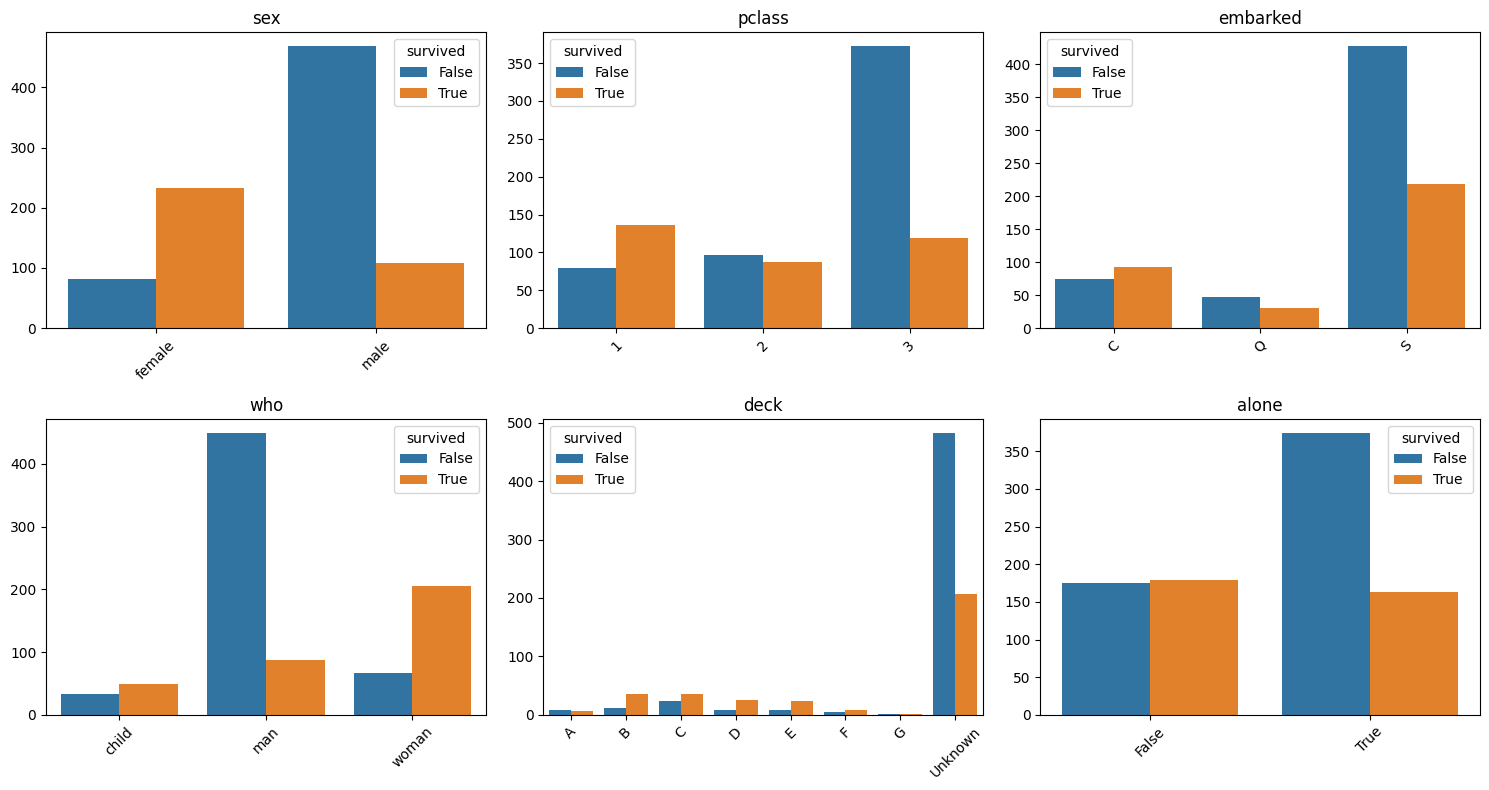


🔍 Análisis visual de variables numéricas:


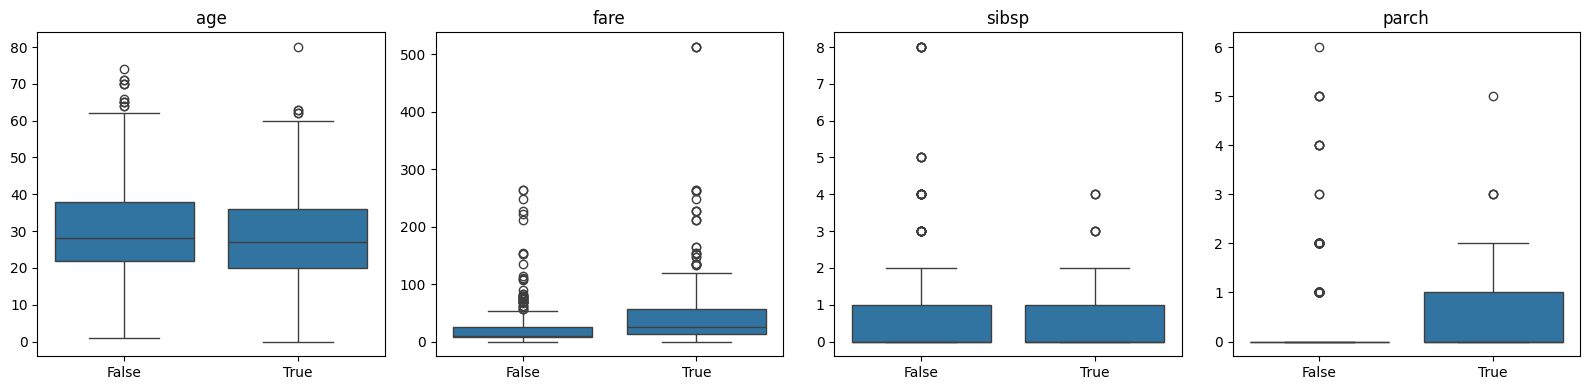

In [29]:
import math

def analizar_relaciones_con_survived(df: pd.DataFrame, cat_cols: list[str], num_cols: list[str]) -> None:
    """
    Visualiza la relación entre variables y 'survived' mediante subplots.

    Parámetros:
    - df: DataFrame limpio
    - cat_cols: lista de columnas categóricas
    - num_cols: lista de columnas numéricas

    Muestra:
    - Gráficos agrupados por tipo de variable (categoría / numérica)
    """
    # ---------- Categóricas ----------
    print("🔍 Análisis visual de variables categóricas:")

    n_cat = len(cat_cols)
    fig_cat, axes_cat = plt.subplots(
        math.ceil(n_cat / 3), min(n_cat, 3),
        figsize=(5 * min(n_cat, 3), 4 * math.ceil(n_cat / 3))
    )
    axes_cat = axes_cat.flatten()

    for i, col in enumerate(cat_cols):
        if col in df.columns:
            sns.countplot(data=df, x=col, hue='survived', ax=axes_cat[i])
            axes_cat[i].set_title(f'{col}')
            axes_cat[i].set_xlabel('')
            axes_cat[i].set_ylabel('')

            axes_cat[i].tick_params(axis='x', rotation=45)

    for j in range(i+1, len(axes_cat)):
        fig_cat.delaxes(axes_cat[j])  # eliminar ejes vacíos

    plt.tight_layout()
    plt.show()

    # ---------- Numéricas ----------
    print("\n🔍 Análisis visual de variables numéricas:")

    n_num = len(num_cols)
    fig_num, axes_num = plt.subplots(
        math.ceil(n_num / 4), min(n_num, 4),
        figsize=(4 * min(n_num, 4), 4 * math.ceil(n_num / 4))
    )
    axes_num = axes_num.flatten()

    for i, col in enumerate(num_cols):
        if col in df.columns:
            sns.boxplot(data=df, x='survived', y=col, ax=axes_num[i])
            axes_num[i].set_title(f'{col}')
            axes_num[i].set_xlabel('')
            axes_num[i].set_ylabel('')


    for j in range(i+1, len(axes_num)):
        fig_num.delaxes(axes_num[j])  # eliminar ejes vacíos

    plt.tight_layout()
    plt.show()



categoricas = ['sex', 'pclass', 'embarked', 'who', 'deck', 'alone']
numericas = ['age', 'fare', 'sibsp', 'parch']

analizar_relaciones_con_survived(titanic_df_ready, categoricas, numericas)


## 📈 Relación entre variables y la supervivencia

A partir de los gráficos generados, se pueden identificar patrones y relaciones significativas entre las variables del dataset y la variable objetivo `survived`:

### 🔹 Variables categóricas

- **`sex`**: se observa una **clara ventaja de supervivencia para las mujeres**. La mayoría de los hombres no sobrevivieron.
- **`pclass`**: la **tercera clase fue la más afectada** por la mortalidad. En primera y segunda clase, las tasas de supervivencia fueron más equilibradas.
- **`embarked`**: la mayoría de los pasajeros embarcaron en **Southampton (`S`)**, pero no necesariamente tuvieron mayor tasa de supervivencia. Es el grupo más numeroso, pero no el más favorecido.
- **`who`**: los **niños (`child`) tuvieron una proporción mayor de supervivencia** que adultos, especialmente en comparación con los hombres.
- **`deck`**: parece haber **mayor supervivencia en cubiertas B, C, D y E**, aunque la alta cantidad de valores `'Unknown'` impide conclusiones precisas. Curiosamente, **la cubierta A**, que probablemente corresponda a primera clase, muestra supervivencia baja, lo cual contradice la expectativa inicial.
- **`alone`**: contrariamente a lo esperado, **las personas que viajaban solas tuvieron mayor supervivencia**, lo cual puede deberse a factores como movilidad, acceso rápido a los botes o decisiones individuales más eficaces.

### 🔹 Variables numéricas

- **`age`**: la mayoría de los pasajeros tenían entre **22 y 38 años**. Las personas mayores tienen una mayor proporción de mortalidad. La edad media de los sobrevivientes es ligeramente menor.
- **`fare`**: se observa que quienes **pagaron tarifas más altas tendieron a sobrevivir más**, aunque hay valores atípicos. Un pasaje extremo de ~500 puede ser un error o caso especial.
- **`sibsp`** y **`parch`**: no hay diferencias drásticas, pero quienes viajaban con pocos familiares parecen tener una leve ventaja.

## 🧾 Resumen de factores asociados a la supervivencia

| Variable        | Valor asociado a **mayor** supervivencia | Valor asociado a **menor** supervivencia | Observación |
|----------------|--------------------------------------------|-------------------------------------------|-------------|
| `sex`          | ♀️ mujer                                   | ♂️ hombre                                  | Asociación clara |
| `pclass`       | 1ra clase                                  | 3ra clase                                 | Más muertes en 3ra clase |
| `embarked`     | C / Q                                      | S                                         | Grupo `S` numeroso pero más afectado |
| `who`          | child, woman                               | man                                       | Alta mortalidad masculina |
| `deck`         | B, C, D, E                                 | G, A, Unknown                             | Datos incompletos; A no muestra ventaja clara |
| `alone`        | True (viajaba solo)                        | False (viajaba acompañado)               | Contrario a lo esperado |
| `age`          | Jóvenes (20–35)                            | Personas mayores                          | Patrón evidente |
| `fare`         | Tarifas medias/altas                      | Tarifas bajas                             | Correlación leve |
| `sibsp/parch`  | 1 o 2 acompañantes                         | Más de 3 o ninguno                        | Tendencia leve |